** 회귀모형 1 **
- 제외변수: Id(의미X), Model(정합성X), Cilynders(variance=0),
- 카테고리: Fuel_Type, Color (엑셀 단에서의 one hot encoding)
- train 데이터 모두 사용

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/train.csv')
test_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/test.csv')

In [93]:
train_rem = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/train_remove.csv')

In [65]:
sm.add_constant(train_rem)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Color,Fuel_Type.1
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,0,0,0,1,0,0,0,0,Blue,Diesel
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,0,0,1,0,0,0,0,Silver,Diesel
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,0,1,0,1,0,0,0,0,Black,Diesel
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,0,0,0,0,1,0,0,0,Silver,Petrol
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,0,1,1,1,1,0,0,0,Red,Petrol
5,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,0,1,1,1,1,0,0,0,Black,Petrol
6,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,0,1,1,1,1,0,0,0,Grey,Petrol
7,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22750,30,3,2002,34000,Petrol,192,1,...,0,1,0,1,1,0,0,0,Grey,Petrol
8,18,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/...,17950,24,9,2002,21716,Petrol,110,1,...,1,0,0,0,0,1,0,1,Blue,Petrol
9,20,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors,16950,30,3,2002,64359,Petrol,110,1,...,0,0,1,1,0,0,0,0,Grey,Petrol


In [69]:
del train_df['Id']
del train_df['Color']
del train_df['Model']
del train_df['Fuel_Type']
del train_df['Fuel_Type.1']
del train_df['Cylinders']

KeyError: 'Id'

In [76]:
y_train_df = train_df['Price']

KeyError: 'Price'

In [36]:
del train_df['Price']

In [70]:
train_df.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,...,col_dummy4,col_dummy5,col_dummy6,col_dummy7,col_dummy8,col_dummy9,col_dummy10,fuel_dumm1,fuel_dumm2,fuel_dumm3
0,23,10,2002,46986,90,1,0,2000,3,4,...,0,0,0,0,0,0,0,0,1,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,0,0,0,0,0,0,0,0,1,0
2,30,3,2002,38500,90,0,0,2000,3,4,...,0,0,0,0,0,0,0,0,1,0
3,25,8,2002,31461,192,0,0,1800,3,4,...,0,0,0,0,0,0,0,0,0,1
4,25,8,2002,32189,192,0,0,1800,3,4,...,1,0,0,0,0,0,0,0,0,1


In [72]:
x_train_df = sm.add_constant(train_df, has_constant='add')

In [73]:
x_train_df.head()

,const,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,col_dummy4,col_dummy5,col_dummy6,col_dummy7,col_dummy8,col_dummy9,col_dummy10,fuel_dumm1,fuel_dumm2,fuel_dumm3
0,1.0,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
1,1.0,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
2,1.0,30,3,2002,38500,90,0,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
3,1.0,25,8,2002,31461,192,0,0,1800,3,...,0,0,0,0,0,0,0,0,0,1
4,1.0,25,8,2002,32189,192,0,0,1800,3,...,1,0,0,0,0,0,0,0,0,1


In [82]:
y_train_df

0       13500
1       13750
2       13750
3       20950
4       19600
5       21500
6       22000
7       22750
8       17950
9       16950
10      15950
11      16950
12      15950
13      16950
14      15950
15      17495
16      15750
17      17950
18      12950
19      15950
20      14950
21      15750
22      15950
23      14950
24      15750
25      13950
26      16750
27      13950
28      16950
29      17950
        ...  
989      7250
990      7450
991      8750
992      9800
993      7500
994      8950
995      8950
996     10500
997      7000
998      8950
999      9250
1000     7900
1001     7950
1002     8750
1003     7500
1004     6950
1005     8750
1006     7750
1007     8450
1008     8150
1009     8500
1010     7600
1011     7950
1012     7750
1013     7950
1014     8950
1015     7500
1016     8500
1017     7250
1018     6950
Name: Price, Length: 1019, dtype: int64

In [83]:
model_corolla = sm.OLS(y_train_df, x_train_df)
result_corolla = model_corolla.fit()

** 회귀모형 1의 결과 **

In [86]:
print(result_corolla.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:13:07   Log-Likelihood:                -8567.8
No. Observations:                1019   AIC:                         1.722e+04
Df Residuals:                     975   BIC:                         1.744e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0078      0.00

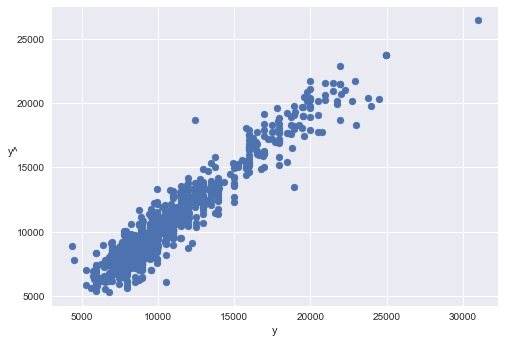

In [91]:
y_train_new = result_corolla.predict(x_train_df)

plt.scatter(y_train_df, y_train_new)
plt.xlabel(u"y")
plt.ylabel(u"y^",rotation=1)
plt.show()

In [96]:
sm.tools.eval_measures.rmse(y_train_df, y_train_new)

1084.7718181200205